In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# get input dataset
features_train = pd.read_csv('data/dengue_features_train.csv')
labels_train = pd.read_csv('data/dengue_labels_train.csv')
features_test = pd.read_csv('data/dengue_features_test.csv')

# Normalize the week_start_date feature value
features_train['week_start_date'] = pd.to_datetime(features_train['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

# combine the labels and features of the training data-set
features_train['total_cases'] = labels_train['total_cases']

# get shapes
print(f'Feature and label train: {features_train.shape}')

# Split into cities: SJ and IQ
FL_sj = features_train.loc[features_train['city'] == 'sj']
FL_iq = features_train.loc[features_train['city'] == 'iq']

test_f_sj = features_test.loc[features_train['city'] == 'sj']
test_f_iq = features_test.loc[features_train['city'] == 'iq']

Feature and label train: (1456, 25)


Get the correlation of the features with respect to total cases of each city

total_cases                              1.000000
weekofyear                               0.287134
reanalysis_specific_humidity_g_per_kg    0.207947
reanalysis_dew_point_temp_k              0.203774
station_avg_temp_c                       0.196617
reanalysis_max_air_temp_k                0.194532
station_max_temp_c                       0.189901
reanalysis_min_air_temp_k                0.187943
reanalysis_air_temp_k                    0.181917
station_min_temp_c                       0.177012
reanalysis_avg_temp_k                    0.175267
reanalysis_relative_humidity_percent     0.144045
reanalysis_precip_amt_kg_per_m2          0.107457
ndvi_nw                                  0.075307
reanalysis_sat_precip_amt_mm             0.060211
precipitation_amt_mm                     0.060211
station_precip_mm                        0.051759
ndvi_ne                                  0.037639
station_diur_temp_rng_c                  0.034630
ndvi_se                                  0.001113


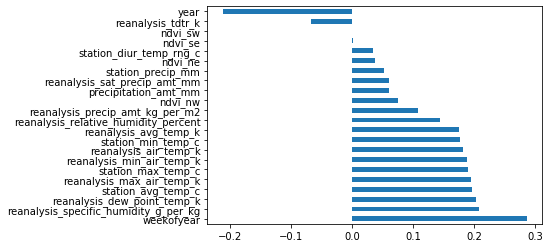

In [2]:
# get the correlation of SJ with the total cases 
FL_sj.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()
FL_sj.corr().total_cases.sort_values(ascending=False)

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.236476
reanalysis_dew_point_temp_k              0.230401
reanalysis_min_air_temp_k                0.214514
station_min_temp_c                       0.211702
year                                     0.179451
reanalysis_relative_humidity_percent     0.130083
station_avg_temp_c                       0.113070
reanalysis_precip_amt_kg_per_m2          0.101171
reanalysis_air_temp_k                    0.097098
reanalysis_sat_precip_amt_mm             0.090171
precipitation_amt_mm                     0.090171
reanalysis_avg_temp_k                    0.079872
station_max_temp_c                       0.075279
station_precip_mm                        0.042976
ndvi_sw                                  0.032999
ndvi_ne                                  0.020215
ndvi_nw                                 -0.009586
weekofyear                              -0.011850
ndvi_se                                 -0.041067


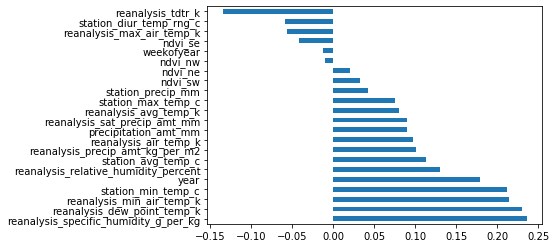

In [3]:
# get the correlation of IQ with the total cases 
FL_iq.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()
FL_iq.corr().total_cases.sort_values(ascending=False)

Plot the graph of total cases with respect to the time

Text(0, 0.5, 'Total Cases')

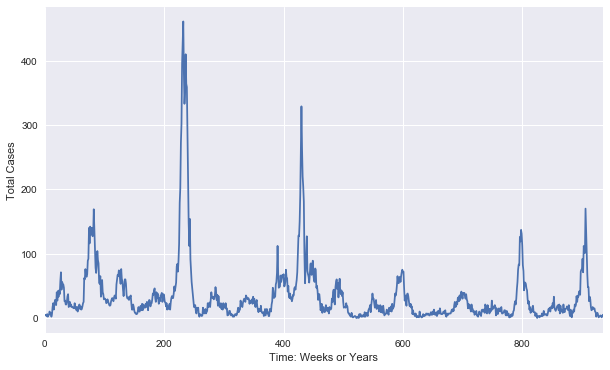

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.style.use('seaborn')
mpl.rc(group='figure', figsize=(10,6))

FL_sj['total_cases'].plot()
plt.xlabel('Time: Weeks or Years')
plt.ylabel('Total Cases')

Let's Analayze the data-set considering its yearly values

Text(0.5, 1.0, 'Total Cases by Week of year, SJ')

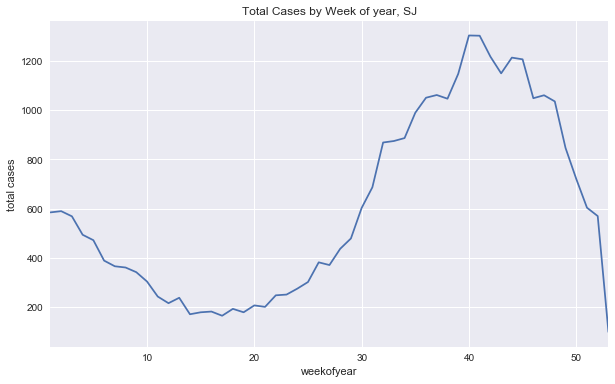

In [5]:
FL_sj.groupby(['weekofyear'])['total_cases'].sum().plot()
plt.ylabel('total cases')
plt.title('Total Cases by Week of year, SJ')

In [6]:
keys = ['city', 'year', 'weekofyear','week_start_date']

sj_features = ['station_avg_temp_c','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
               'station_max_temp_c','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']

iq_features = ['station_avg_temp_c','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
               'station_min_temp_c']

FL_sj =  FL_sj[keys + sj_features]
FL_iq =  FL_iq[keys + iq_features]

FL_sj.fillna(method='bfill', inplace=True)
FL_iq.fillna(method='ffill', inplace=True)

# Change Celsious values to Kelvin
FL_sj['station_avg_temp_k'] = FL_sj['station_avg_temp_c'] + 273.15
FL_sj['station_max_temp_k'] = FL_sj['station_max_temp_c'] + 273.15

FL_iq['station_min_temp_k'] = FL_iq['station_min_temp_c'] + 273.15
FL_iq['station_avg_temp_k'] = FL_iq['station_avg_temp_c'] + 273.15

test_f_sj['station_avg_temp_k'] = test_f_sj['station_avg_temp_c'] + 273.15
test_f_sj['station_max_temp_k'] = test_f_sj['station_max_temp_c'] + 273.15

test_f_iq['station_min_temp_k'] = test_f_iq['station_min_temp_c'] + 273.15
test_f_iq['station_avg_temp_k'] = test_f_iq['station_avg_temp_c'] + 273.15

In [7]:
new_features_sj = ['station_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
               'station_max_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']
new_features_iq = ['station_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
               'station_min_temp_k']

FL_sj =  FL_sj[keys + new_features_sj]
FL_iq = FL_iq[keys + new_features_iq]
test_f_sj = test_f_sj[keys + new_features_sj]
test_f_iq = test_f_iq[keys + new_features_iq]

Add Time series

In [8]:
# normalize data
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [9]:
features_to_normalize = []


FL_sj[new_features_sj] = FL_sj[new_features_sj].apply(normalize, axis=0)
FL_iq[new_features_iq] = FL_iq[new_features_iq].apply(normalize, axis=0)

test_f_sj[new_features_sj] = test_f_sj[new_features_sj].apply(normalize, axis=0)
test_f_iq[new_features_iq] = test_f_iq[new_features_iq].apply(normalize, axis=0)

In [10]:
FL_sj.head()

,city,year,weekofyear,week_start_date,station_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_max_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k
0,sj,1990,18,1990-04-30,-1.096450,-1.712359,-1.622450,-1.274491,-1.260993,-1.080168
1,sj,1990,19,1990-05-07,-0.199275,-0.733137,-0.751033,0.060720,-0.388526,-0.693449
2,sj,1990,20,1990-05-14,-0.199275,0.211502,0.194528,0.350983,-0.705787,0.002644
3,sj,1990,21,1990-05-21,0.334998,0.132327,0.081940,0.989562,0.008050,-0.229387
4,sj,1990,22,1990-05-28,1.373301,0.458127,0.426113,1.976457,0.404626,0.157332


In [11]:
FL_iq.tail()

,city,year,weekofyear,week_start_date,station_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_min_temp_k
1451,iq,2010,21,2010-05-28,1.239863,0.938227,0.958870,0.945840
1452,iq,2010,22,2010-06-04,-0.080308,0.674605,0.670789,0.389284
1453,iq,2010,23,2010-06-11,-3.417408,0.001913,-0.064757,-1.598417
1454,iq,2010,24,2010-06-18,-2.280593,-0.123333,-0.198403,-0.167273
1455,iq,2010,25,2010-06-25,-0.034469,0.218063,0.175805,0.786824


In [12]:
def add_time_series_features(df, window):
    df.set_index('week_start_date', inplace=True)

    roll_df = df.rolling(window=window, min_periods=1)
    df['recent_mean_dew_point'] = roll_df.reanalysis_dew_point_temp_k.mean()
    df['recent_mean_spec_humid'] = roll_df.reanalysis_specific_humidity_g_per_kg.mean()
    df['recent_mean_station_avg_temp_c'] = roll_df.station_avg_temp_k.sum()
    
    df.reset_index(inplace=True)    
    return df 

In [13]:
features_sj = ['station_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg','station_max_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']
features_iq = ['station_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg','station_min_temp_k']

train_sj = add_time_series_features(FL_sj,window=100)
train_iq = add_time_series_features(FL_iq,window=30)
test_sj = add_time_series_features(test_f_sj,window=100)
test_iq = add_time_series_features(test_f_iq,window=30)

In [14]:
train_sj.drop('week_start_date',axis=1, inplace=True)
train_iq.drop('week_start_date',axis=1, inplace=True)
test_sj.drop('week_start_date',axis=1, inplace=True)
test_iq.drop('week_start_date',axis=1, inplace=True)

In [15]:
from sklearn.model_selection import train_test_split

# train_sj.set_index('index', inplace=True)
# train_iq.set_index('index', inplace=True)

y_sj = labels_train.loc[labels_train['city'] == 'sj']
y_iq = labels_train.loc[labels_train['city'] == 'iq']

In [16]:

X_train_sj, X_cross_sj, y_train_sj, y_cross_sj = train_test_split(train_sj, 
                                                                  y_sj,
                                                                  test_size=0.2,
                                                                  stratify=train_sj.weekofyear)

print(f'X_train_sj: {X_train_sj.shape}')
print(f'y_train_sj: {y_train_sj.shape}')
print(f'X_cross_sj: {X_cross_sj.shape}')
print(f'y_cross_sj: {y_cross_sj.shape}')

X_train_sj: (748, 12)
y_train_sj: (748, 4)
X_cross_sj: (188, 12)
y_cross_sj: (188, 4)


In [17]:

X_train_iq, X_cross_iq, y_train_iq, y_cross_iq = train_test_split(train_iq, 
                                                                  y_iq, 
                                                                  test_size=0.2,
                                                                  stratify=train_iq.weekofyear)

print(f'X_train_iq: {X_train_iq.shape}')
print(f'y_train_iq: {y_train_iq.shape}')
print(f'X_cross_iq: {X_cross_iq.shape}')
print(f'y_cross_iq: {y_cross_iq.shape}')

X_train_iq: (416, 10)
y_train_iq: (416, 4)
X_cross_iq: (104, 10)
y_cross_iq: (104, 4)


In [18]:
def train_predict_score(reg, X, y):
    reg.fit(X, y)
    y_pred = reg.predict(X)
    return mean_absolute_error(y_true=y, y_pred=y_pred)

In [19]:
def train_cross_val_score(reg, X, y, scoring='neg_mean_absolute_error'):
    reg.fit(X, y)
    scores = np.abs(cross_val_score(reg, X, y, scoring=scoring))
    print("Scores: {}".format(scores))
    print("Avg Score: {}".format(scores.mean()))

In [20]:
nec_features_sj = features_sj + ['weekofyear']
nec_features_iq = features_iq + ['weekofyear']

X_train_sj = X_train_sj[nec_features_sj]
X_cross_sj = X_cross_sj[nec_features_sj]
y_train_sj = y_train_sj['total_cases']
y_cross_sj = y_cross_sj['total_cases']

X_train_iq = X_train_iq[nec_features_iq]
X_cross_iq = X_cross_iq[nec_features_iq]
y_train_iq = y_train_iq['total_cases']
y_cross_iq =  y_cross_iq['total_cases']

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn.model_selection import GridSearchCV

def grid_search_cross_val(reg, X, y, param_grid, scoring='neg_mean_absolute_error'):
    grid = GridSearchCV(reg, param_grid=param_grid, scoring=scoring)
    grid.fit(X, y)
    print("Best score: {}".format(np.abs(grid.best_score_)))
    print("Best params: {}".format(grid.best_params_))

In [23]:
from sklearn.metrics import mean_absolute_error

def cross_validate_out_of_sample(reg, X_train, y_train, X_cross, y_cross):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_cross)
    return mean_absolute_error(y_true=y_cross, y_pred=y_pred)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# GB sj
reg_sj = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=500, random_state=67)
cross_validate_out_of_sample(reg_sj, X_train_sj, y_train_sj, X_cross_sj, y_cross_sj)

22.276283198364705

In [26]:
# GB iq
reg_iq = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=500, random_state=67)
cross_validate_out_of_sample(reg_iq, X_train_iq, y_train_iq, X_cross_iq, y_cross_iq)

7.5157798584292115

# Preprocess the Training Data set

### Feature Selection 

Select features from the features in the training. So that

### Spliting the training data set into train and test data sets

Here we divide the tarining data set into two parts: for training and for testing.
**X_cross_sj** is the testing data set extracted from the training data of city 'sj'
**y_cross_sj** is the testing label values extracted from the training data of city 'sj'

In [ ]:
from sklearn.model_selection import train_test_split

# train_sj.set_index('index', inplace=True)
# train_iq.set_index('index', inplace=True)

y_sj = labels_train.loc[labels_train['city'] == 'sj']
y_iq = labels_train.loc[labels_train['city'] == 'iq']

In [ ]:
X_train_sj, X_cross_sj, y_train_sj, y_cross_sj = train_test_split(train_sj, 
                                                                  y_sj,
                                                                  test_size=0.2,
                                                                  stratify=train_sj.weekofyear)

print(f'X_train_sj: {X_train_sj.shape}')
print(f'y_train_sj: {y_train_sj.shape}')
print(f'X_cross_sj: {X_cross_sj.shape}')
print(f'y_cross_sj: {y_cross_sj.shape}')

In [ ]:
X_train_iq, X_cross_iq, y_train_iq, y_cross_iq = train_test_split(train_iq, 
                                                                  y_iq, 
                                                                  test_size=0.2,
                                                                  stratify=train_iq.weekofyear)

print(f'X_train_iq: {X_train_iq.shape}')
print(f'y_train_iq: {y_train_iq.shape}')
print(f'X_cross_iq: {X_cross_iq.shape}')
print(f'y_cross_iq: {y_cross_iq.shape}')

# Train the Model with Data set

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# find the ccurancy of the model with the mean absolute value
def cross_validate_out_of_sample(reg, X_train, y_train, X_cross, y_cross):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_cross)
    return mean_absolute_error(y_true=y_cross, y_pred=y_pred)


# Train the model with SJ data set
reg_sj = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=500, random_state=67)
cross_validate_out_of_sample(reg_sj, X_train_sj, y_train_sj, X_cross_sj, y_cross_sj)

In [ ]:
# Train the model with IQ data set
reg_iq = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=500, random_state=67)
cross_validate_out_of_sample(reg_iq, X_train_iq, y_train_iq, X_cross_iq, y_cross_iq)

In [1]:
# Submission the results
def submission(pred):
    submission = pd.read_csv("data/submission_format.csv", index_col=[0, 1, 2])
    submission['total_cases'] = pred
    submission.to_csv("./submissions/sub_DengAI.csv")

# Preprocess the Test Data set